CONSTANTS

In [1]:
H_0 = 75 #km/s/Mpc
m_0 = -20.45

FUNCTIONS

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#function to read data from txt file
def read_data(filename):
    global name, redshift, eff_peak_mag, mag_err
    alldata = np.loadtxt(filename, dtype='str', comments='#')
    name = alldata[:, 0]
    redshift = np.array(alldata[:, 1], dtype = float)
    eff_peak_mag = np.array(alldata[:, 2], dtype = float)
    mag_err = np.array(alldata[:, 3], dtype = float)

#function to calculate peak flux from effective peak magnitudes (and the respective errors)
def get_flux(eff_peak_mag, mag_err):
    global peak_flux, peak_flux_err
    peak_flux = 10**(0.4*(m_0-eff_peak_mag))
    peak_flux_err = 10**(0.4*(m_0-(eff_peak_mag+mag_err)))-peak_flux

#function to calculate the comoving distance for a given redshift
def get_comoving_distance(redshift):
    global comoving_distance
    comoving_distance = 3*10**8*redshift/H_0 #in Mpc

#function to calculate the peak luminosity, and its respective error, from peak flux and redshift.
def get_peak_luminosity(comoving_distance, redshift, peak_flux, peak_flux_err):
    global L_peak, L_peak_err
    L_peak = peak_flux*4*np.pi*(1+redshift)**2*comoving_distance**2
    L_peak_err = (peak_flux+peak_flux_err)*4*np.pi*(1+redshift)**2*comoving_distance**2 - L_peak

#function to calculate the luminosity distance and its error from peak luminosity and flux.
def get_luminosity_distance(L_peak, L_peak_err, peak_flux, peak_flux_err):
    global d_L, d_L_err
    d_L = np.sqrt(L_peak/(4*np.pi*peak_flux))
    d_L_err = d_L*np.sqrt((L_peak_err/L_peak)**2+(peak_flux_err/peak_flux)**2)


Investigate relationship between luminosity distance and redshift

_NOTE: We expect a  roughly linear relationship between distance and redshift, known as Hubble’s Law. However, if we extend the measurement to more distant objects, the relation becomes curved, and strongly dependent on the matter content of the Universe._

Text(0, 0.5, 'Redshift $z$')

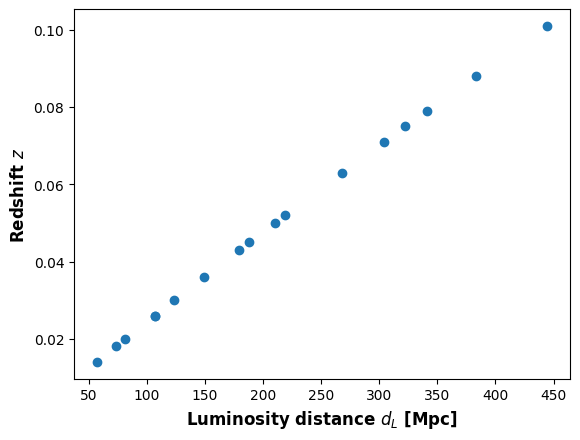

In [38]:
#reads data
read_data('sn_data.txt')

#z < 0.1 data
low_redshift_indices = np.where(redshift<0.1)[0]
get_comoving_distance(redshift[low_redshift_indices[0]:low_redshift_indices[-1]])
get_flux(eff_peak_mag, mag_err)
get_peak_luminosity(comoving_distance, redshift[low_redshift_indices[0]:low_redshift_indices[-1]],  peak_flux[low_redshift_indices[0]:low_redshift_indices[-1]], peak_flux_err[low_redshift_indices[0]:low_redshift_indices[-1]])
get_luminosity_distance(L_peak, L_peak_err, peak_flux[low_redshift_indices[0]:low_redshift_indices[-1]], peak_flux_err[low_redshift_indices[0]:low_redshift_indices[-1]])

plt.scatter(d_L/1000, redshift[low_redshift_indices[0]:low_redshift_indices[-1]])
plt.xlabel('Luminosity distance $d_L$ [Mpc]', weight = 'bold', fontsize = 12)
plt.ylabel('Redshift $z$', weight = 'bold', fontsize = 12)